In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# fetch the image

image =  "/Users/ochwada/01_Personal_Projects/iphone_26_June/IMG_1562.jpeg"
img = cv2.imread(image)

print("Image has been read.")

Image has been read.


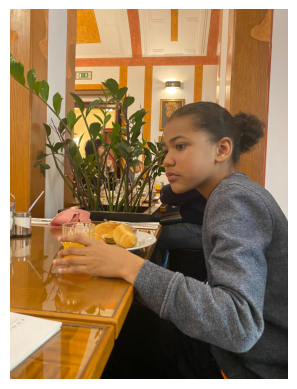

In [3]:
# Displaying the image and also confirming that the image isn't null

if img is None:
    print("Failed to load image.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

In [4]:
# Color Quantization using K-Means Clustering

def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

In [5]:
# Creating Edge Mask

def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

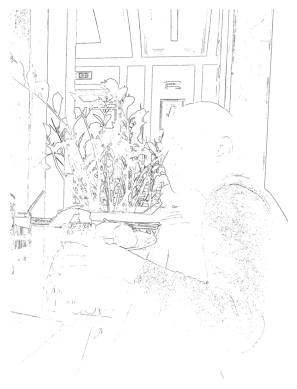

In [6]:
# Generating Pencil Sketch from Image

line_size = 7
blur_value = 7

if img is None:
    print("Failed to load image.")
else:
    edges = edge_mask(img, line_size, blur_value)
    cv2.imwrite('pencil_sketch.jpg', edges)
    
    # Display the image using matplotlib instead of cv2
    plt.imshow(edges, cmap='gray')
    plt.axis('off')  # This will hide the axis values
    plt.show()

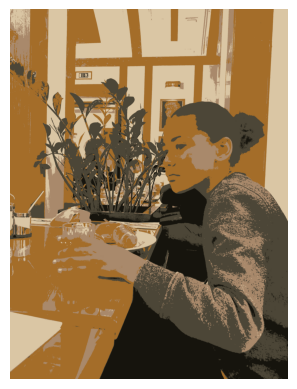

In [9]:
# Generating Cartoon from Image

total_color = 5

if img is None:
    print("Failed to load image.")
else:
    img = color_quantization(img, total_color)  # The color_quantization function should be defined elsewhere.
    cv2.imwrite('cartoonize.jpg', img)
    
    # Display the image using matplotlib instead of cv2
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')  # This will hide the axis values
    plt.show()

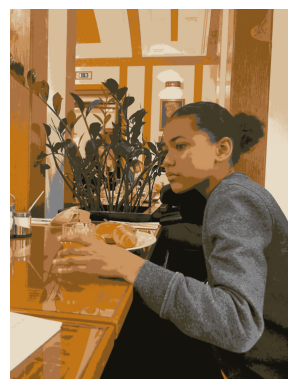

In [8]:
# Applying Bilateral Filter to the Image

bilateral = cv2.bilateralFilter(img, 15, 75, 75)

if img is None:
    print("Failed to load image.")
else:
    bilateral = cv2.bilateralFilter(img, 15, 75, 75)
    cv2.imwrite('blur.jpg', bilateral)
    
    # Re-reading the image may not be necessary here. You can directly display 'bilateral'
    img = cv2.imread('blur.jpg')
    
    # Convert color style from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image using matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')  # This will hide the axis values
    plt.show()
